In [2]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss, roc_curve, roc_auc_score, zero_one_loss, classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib import pyplot
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline, make_pipeline

In [3]:
#Reading the file and splitting our target column
train_data = pd.read_csv (r'bank-additional\bank-additional-trainclusters.csv')   
test_data = pd.read_csv (r'bank-additional\bank-additional-testclusters.csv')   


train_targets= train_data['onehotencoder__y_yes']
train_features = train_data.drop(columns=['onehotencoder__y_yes']).values

test_targets= test_data['onehotencoder__y_yes']
test_features = test_data.drop(columns=['onehotencoder__y_yes']).values

In [4]:
# define lists to collect scores
train_scores, test_scores = list(), list()
def range_with_floats(start, stop, step):
    while stop > start:
        yield start
        start += step

In [5]:
# define hyperparameter search space
learning_rate = [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)] 
max_depth = [1,2,3,4,5,6,7,8]
n_estimators = range(1,5002, 1000)

# create dictionary from search space
grid = dict(
    gradientboostingclassifier__max_depth=max_depth,
    gradientboostingclassifier__learning_rate=learning_rate,
    gradientboostingclassifier__n_estimators=n_estimators,
)

# create 10-fold cross validation generator
cv = KFold(n_splits=10)

# create imbalanced learn pipeline
imba_pipeline = make_pipeline(NearMiss(version=1), GradientBoostingClassifier(max_depth=1, 
                                                                                 learning_rate = 0.1,
                                          n_estimators= 123 ,random_state=23))
#cross_val_score(imba_pipeline, X_train, y_train, scoring='roc_auc', cv=cv)
                              

# create random searcher with 10-fold cv and start tuning process
model_grid = GridSearchCV(estimator=imba_pipeline, param_grid=grid, n_jobs=1, cv=cv, verbose=2, scoring='roc_auc')
grid_res = model_grid.fit(train_features, train_targets)

# summarise grid search info
bestScore = grid_res.best_score_
bestParams = grid_res.best_params_
print("[INFO] best score is {:.2f} using {}".format(bestScore,
    bestParams))

Fitting 10 folds for each of 288 candidates, totalling 2880 fits
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.3s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.2s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimato

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  11.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  10.9s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  11.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  11.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  10.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=  11.2s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.2s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.2s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.2s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.4s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.4s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.5s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.5s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.5s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.7s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.8s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   7.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   7.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   7.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   7.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   7.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  13.3s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   8.7s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   8.4s
[CV] END gradientboostingclassifie

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  37.6s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  38.2s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  38.2s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassi

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  36.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  35.3s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  44.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  43.4s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  43.1s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  43.3s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  30.9s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  40.4s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  39.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  39.8s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  39.6s
[CV] END gradientboostingclassifier__learning_rate=0.1, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  40.1s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.2s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.0s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.1s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.0s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.1s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.1s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.5s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.5s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.5s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.4s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifie

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.6s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.6s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  25.5s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.3s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.1s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  25.3s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  23.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  23.3s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  23.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  23.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  23.5s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=4001; total time=  31.2s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  19.0s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  19.5s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  19.3s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  19.3s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=3001; total time=  28.7s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=3001; total time=  28.1s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=  12.3s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=  12.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=  11.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=2001; total time=  23.9s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=2001; total time=  23.4s
[CV] END gradientboostingclassifier__learning_rate=0.01, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=2001; total time=  23.7s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.6s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.9s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.5s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  16.1s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  15.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  15.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  15.9s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.3s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.3s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  15.2s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  15.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  15.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  14.7s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.3s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.4s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.1s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.4s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  37.3s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  36.9s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   0.9s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  36.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  35.8s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  45.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  45.1s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  45.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  43.9s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  33.5s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  30.6s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  45.0s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  44.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  44.7s
[CV] END gradientboostingclassifier__learning_rate=0.001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  42.1s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.4s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.4s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=3001; total time=   6.0s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.5s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.3s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.3s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=2001; total time=   6.3s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.8s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.7s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1001; total time=   4.6s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  19.5s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  19.3s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.9s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  24.3s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  24.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  24.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=5001; total time=  23.1s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.9s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  23.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  23.7s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  22.9s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=4001; total time=  22.4s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  14.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  13.8s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  20.5s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  20.9s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  20.3s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=3001; total time=  20.0s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.5s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  16.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  16.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  15.9s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=2001; total time=  16.2s
[CV]

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=   9.7s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=   9.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=   9.6s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1001; total time=   9.4s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  45.1s
[CV] END gradientboostingclassifier__learning_rate=0.0001, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  42.9s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboo

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=4001; total time=   7.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=4001; total time=   7.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.6s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.4s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.5s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=5001; total time=   9.4s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=3001; total time=   9.2s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=3001; total time=   9.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  12.4s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  11.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  11.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=4001; total time=  11.8s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=2001; total time=   8.5s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=2001; total time=   8.3s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.2s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  11.9s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=3001; total time=  11.9s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1001; total time=   5.6s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=1001; total time=   5.6s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.6s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.4s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=2001; total time=  10.0s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1; total time=   1.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.6s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.4s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.4s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=1001; total time=   6.4s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=5001; total time=  28.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=5001; total time=  28.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=4001; total time=  27.2s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=4001; total time=  26.9s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  33.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  33.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  33.2s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=5001; total time=  32.7s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=3001; total time=  23.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=3001; total time=  23.2s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  31.1s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  30.9s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  30.8s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=4001; total time=  30.5s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=2001; total time=  18.5s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=2001; total time=  17.7s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  27.0s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  26.7s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  26.7s
[CV] END gradientboostingclassifier__learning_rate=1e-05, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=3001; total time=  26.1s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=1001; total time=   2.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.6s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.3s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.4s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=1, gradientboostingclassifier__n_estimators=2001; total time=   4.4s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.6s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=1001; total time=   3.6s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=2, gradientboostingclassifier__n_estimators=5001; total time=  14.6s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  16.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=4001; total time=  15.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  20.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  19.2s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  19.3s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=3, gradientboostingclassifier__n_estimators=5001; total time=  19.2s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  15.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=3001; total time=  15.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.4s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=4, gradientboostingclassifier__n_estimators=4001; total time=  19.0s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=2001; total time=  12.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.5s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.4s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=5, gradientboostingclassifier__n_estimators=3001; total time=  17.5s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.5s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=1001; total time=   7.5s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  14.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  13.9s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  13.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=6, gradientboostingclassifier__n_estimators=2001; total time=  13.6s
[CV] END g

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.4s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.4s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=1001; total time=   8.4s
[CV] END gradien

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  39.2s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=7, gradientboostingclassifier__n_estimators=5001; total time=  38.2s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=1; total time=   1.0s
[CV] END gradientboost

[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  36.7s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=4001; total time=  35.1s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  44.8s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  44.6s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  44.9s
[CV] END gradientboostingclassifier__learning_rate=1e-06, gradientboostingclassifier__max_depth=8, gradientboostingclassifier__n_estimators=5001; total time=  43.5s
[CV] END g

In [6]:
print("[INFO] best score is {:.2f} using {}".format(bestScore, bestParams))

[INFO] best score is 0.76 using {'gradientboostingclassifier__learning_rate': 0.001, 'gradientboostingclassifier__max_depth': 1, 'gradientboostingclassifier__n_estimators': 1001}


Confusion Matrix:
[[4559 2792]
 [ 217  670]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.95      0.62      0.75      7351
         1.0       0.19      0.76      0.31       887

    accuracy                           0.63      8238
   macro avg       0.57      0.69      0.53      8238
weighted avg       0.87      0.63      0.70      8238



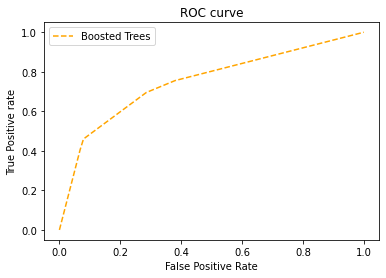

AUC Score: 0.751


In [8]:
predictions = model_grid.predict(test_features)
    
print("Confusion Matrix:")
print(confusion_matrix(test_targets, predictions))

print("Classification Report")
print(classification_report(test_targets, predictions))
    
#Beginning the plotting of ROC-curve
pred_prob = model_grid.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
#Plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
    
#AUC Score
auc_score = roc_auc_score(test_targets, pred_prob[:,1])
print("AUC Score: " + str(np.round(auc_score , 3)))

In [9]:
#Now we set our n_estimator and learning_rate to the optimal value found in the last grid search
learningRate = 0.001
nEstimator = 1001
maximumDepth = 1

Learning rate: 0.100000, train: 0.599, test: 0.607
Learning rate: 0.010000, train: 0.589, test: 0.597
Learning rate: 0.001000, train: 0.500, test: 0.500
Learning rate: 0.000100, train: 0.500, test: 0.500
Learning rate: 0.000010, train: 0.500, test: 0.500
Learning rate: 0.000001, train: 0.500, test: 0.500


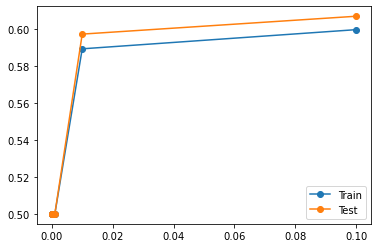

In [10]:
#Check for overfitting with learning_rate

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the learning rate to evaluate
values = [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)]
# evaluate a decision tree for learning rate
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = i, n_estimators=nEstimator, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('Learning rate: %.6f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs learning rate
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

n_estimator: 1, train: 0.500, test: 0.500
n_estimator: 101, train: 0.500, test: 0.500
n_estimator: 201, train: 0.500, test: 0.500
n_estimator: 301, train: 0.500, test: 0.500
n_estimator: 401, train: 0.500, test: 0.500
n_estimator: 501, train: 0.500, test: 0.500
n_estimator: 601, train: 0.500, test: 0.500
n_estimator: 701, train: 0.500, test: 0.500
n_estimator: 801, train: 0.500, test: 0.500
n_estimator: 901, train: 0.500, test: 0.500
n_estimator: 1001, train: 0.500, test: 0.500
n_estimator: 1101, train: 0.500, test: 0.500
n_estimator: 1201, train: 0.500, test: 0.500
n_estimator: 1301, train: 0.500, test: 0.500
n_estimator: 1401, train: 0.500, test: 0.500
n_estimator: 1501, train: 0.500, test: 0.500
n_estimator: 1601, train: 0.569, test: 0.575
n_estimator: 1701, train: 0.582, test: 0.585
n_estimator: 1801, train: 0.582, test: 0.585
n_estimator: 1901, train: 0.582, test: 0.585
n_estimator: 2001, train: 0.582, test: 0.585
n_estimator: 2101, train: 0.582, test: 0.585
n_estimator: 2201, tra

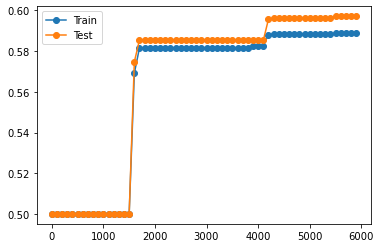

In [11]:
#Check for overfitting with n_estimators

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [i for i in range_with_floats(1, 6001, 100)]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = learningRate, n_estimators=i, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('n_estimator: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

tree depth: 1, train: 0.500, test: 0.500
tree depth: 2, train: 0.500, test: 0.500
tree depth: 3, train: 0.566, test: 0.571
tree depth: 4, train: 0.546, test: 0.549
tree depth: 5, train: 0.561, test: 0.555
tree depth: 6, train: 0.559, test: 0.548
tree depth: 7, train: 0.569, test: 0.541
tree depth: 8, train: 0.579, test: 0.541


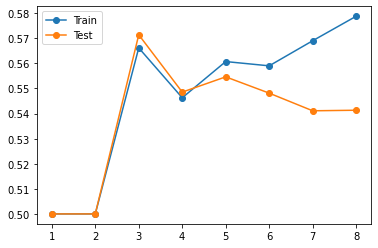

In [12]:
#Check for overfitting with n_estimators

# define lists to collect scores
train_scores, test_scores = list(), list()

# define the estimators to evaluate
values = [1,2,3,4,5,6,7,8]
# evaluate a decision tree for estimator
for i in values:
    # configure the model
    model = GradientBoostingClassifier(max_depth=i, learning_rate = learningRate, n_estimators=nEstimator, random_state=23).fit(
        train_features, train_targets)
    # evaluate on the train dataset
    schatting = model.predict(train_features)
    train_acc = roc_auc_score(train_targets, schatting)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_schatting = model.predict(test_features)
    test_acc = roc_auc_score(test_targets, test_schatting)
    test_scores.append(test_acc)
    # summarize progress
    print('tree depth: %.0f, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs n_estimator
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [15]:
ensemble = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = learningRate,n_estimators=nEstimator ,random_state=23).fit(
        train_features, train_targets)

#After the first run we make jumps of 100, 10 and lastly 1 for n_estimator

param_grid = {'learning_rate': [0.1, 0.01, pow(10,-3), pow(10,-4), pow(10,-5), pow(10,-6)], 
              'max_depth' : [1,2,3,4,5,6,7,8],
             'n_estimators' : range(1,6002, 1000)}
grid = GridSearchCV(ensemble,param_grid,refit=True, scoring='roc_auc' ,verbose =2)
grid.fit(train_features,train_targets)
print(grid.best_estimator_)
print(grid.best_params_)

grid_predictions = grid.predict(test_features)
print(confusion_matrix(test_targets,grid_predictions))
print(classification_report(test_targets,grid_predictions))

Fitting 5 folds for each of 336 candidates, totalling 1680 fits
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END .....learning_rate=0.1, max_depth=1, n_estimators=1; total time=   0.0s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   6.5s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   6.5s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   6.5s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   6.5s
[CV] END ..learning_rate=0.1, max_depth=1, n_estimators=1001; total time=   6.5s


KeyboardInterrupt: 

mean cross validation score: 0.765
Confusion Matrix:
[[7351    0]
 [ 887    0]]
Classification Report
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94      7351
         1.0       0.00      0.00      0.00       887

    accuracy                           0.89      8238
   macro avg       0.45      0.50      0.47      8238
weighted avg       0.80      0.89      0.84      8238



C:\Users\DK200\anaconda3\envs\marketingseminar\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DK200\anaconda3\envs\marketingseminar\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DK200\anaconda3\envs\marketingseminar\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

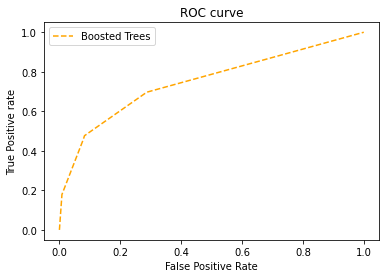

AUC Score: 0.75


In [16]:
#Boosting the tree and predicting with ROC curve and classification reports

ensemble = GradientBoostingClassifier(max_depth=maximumDepth, learning_rate = learningRate,
                                          n_estimators= nEstimator ,random_state=23)
    
k = 10
kf = KFold(n_splits=k, shuffle = True)

    
dt_scores = cross_val_score(ensemble, train_features, train_targets, scoring ='roc_auc' ,cv = kf)
print("mean cross validation score: {}".format(np.round(np.mean(dt_scores),3)))

ensemble.fit(train_features, train_targets)
predictions = ensemble.predict(test_features)
    
print("Confusion Matrix:")
print(confusion_matrix(test_targets, predictions))

print("Classification Report")
print(classification_report(test_targets, predictions))
    
#Beginning the plotting of ROC-curve
pred_prob = ensemble.predict_proba(test_features)
fpr, tpr, thresh = roc_curve(test_targets, pred_prob[:,1], pos_label=1)
    
#Plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Boosted Trees')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
    
#AUC Score
auc_score = roc_auc_score(test_targets, pred_prob[:,1])
print("AUC Score: " + str(np.round(auc_score , 3)))